In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# import the libraries

import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import neighbors
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

***Clean the data***

In [3]:
# read the data and normilize it
df=pd.read_csv('main_50k_pixels.csv',encoding='latin-1', delimiter=";", low_memory=False)

In [4]:
df.shape

(47107, 106)

In [5]:
del df['luc']

In [6]:
df_norm=df.convert_objects(convert_numeric=True).apply(lambda x: (x-x.min())/np.ptp(x)).dropna(how='any', axis=0)

/Users/polina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [7]:
df_norm.shape

(39778, 105)

###df.columns.tolist()

In [8]:
# create 3 subsets for different years
df1=df_norm[df_norm.columns.drop(list(df_norm.filter(regex='id2|Unnamed: 0|pobtot1973|vivocupada1973|2000|dfedge.86|dfedge.97|for.86|for.97|pro.aft80per|popgrowth')))]
df2=df_norm[df_norm.columns.drop(list(df_norm.filter(regex='id2|Unnamed: 0|pobtot1973|vivocupada1973|2000|dfedge.60|dfedge.97|for.60|for.97|pro.aft80per|popgrowth')))]
df3=df_norm[df_norm.columns.drop(list(df_norm.filter(regex='id2|Unnamed: 0|poptot2000|pobtot1973|empty.2000|pop.2000|73|1960|dfedge.60|dfedge.86|for.60|for.86|pro.bef80per|pro.before2000per|popgrowth')))]

In [9]:
print(df1.shape)
print(df2.shape)
print(df3.shape)

(39778, 55)
(39778, 55)
(39778, 55)


In [10]:
F1 = df1['for.60']
F2 = df2['for.86']
F3 = df3['for.97']

In [11]:
(df1['for.60'] != 0).sum()

23291

In [12]:
(df1['for.60'] != 1).sum()

16487

In [13]:
(df2['for.86'] != 0).sum()

17589

In [14]:
(df2['for.86'] != 1).sum()

22189

In [15]:
(df3['for.97'] != 1).sum()

21100

In [16]:
(df3['for.97'] != 0).sum()

18678

In [17]:
# Rearrange the data to have predictor as a first column
df1.drop(labels=['for.60'], axis=1,inplace = True)
df1.insert(0, 'for.60', F1)
df2.drop(labels=['for.86'], axis=1,inplace = True)
df2.insert(0, 'for.86', F2)
df3.drop(labels=['for.97'], axis=1,inplace = True)
df3.insert(0, 'for.97', F3)

/Users/polina/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [18]:
print(df1.shape)
print(df2.shape)
print(df3.shape)

(39778, 55)
(39778, 55)
(39778, 55)


In [19]:
df.head(15)


,Unnamed: 0,id2,dmcity,drd,drd.00,dfedge.60,dfedge.86,dfedge.97,for.60,for.86,...,nowashmach.v73,nohotwater.v73,clpovindex73,empty.2000,popden73,popden2000,pro.bef80per,pro.before2000per,pro.aft80per,popgrowth
0,1,2,215.660624,1.046074621,41.690693339,0,0.000000,0.000000,0,0,...,1.197336,0.451949,19.144095,0,0.006655,0.005788,0.0,0.0,0.0,-0.130186
1,2,3,214.936769,1.069688656,41.047379397,0,0.249854,0.181332,0,1,...,1.197336,0.451949,19.144095,0,0.006655,0.005788,0.0,0.0,0.0,-0.130186
2,3,4,214.804967,0.34683503,40.778031978,0.425272624,0.000000,0.000000,1,0,...,1.197336,0.451949,19.144095,0,0.006655,0.005788,0.0,0.0,0.0,-0.130186
3,4,5,213.683042,1.273659945,39.970183179,0,0.000000,0.000000,0,0,...,1.197336,0.451949,19.144095,0,0.006655,0.005788,0.0,0.0,0.0,-0.130186
4,5,7,211.857902,1.473443172,38.060196214,0.567785892,0.000000,0.000000,1,0,...,1.197336,0.451949,19.144095,0,0.006655,0.005788,0.0,0.0,0.0,-0.130186
5,6,8,210.391826,3.183088443,36.840773815,0,0.000000,0.004876,0,0,...,1.197336,0.451949,19.144095,0,0.006655,0.005788,0.0,0.0,0.0,-0.130186
6,7,9,209.751027,3.624470173,36.12419624,0,0.000000,0.065359,0,0,...,1.197336,0.451949,19.144095,0,0.006655,0.005788,0.0,0.0,0.0,-0.130186
7,8,10,208.630432,4.695570655,35.027658264,0.71487222,0.000000,0.140736,1,0,...,1.197336,0.451949,19.144095,0,0.006655,0.005788,0.0,0.0,0.0,-0.130186
8,9,11,207.975116,5.234155455,34.128782699,0.004187869,0.000000,0.027546,1,0,...,1.197336,0.451949,19.144095,0,0.006655,0.005788,0.0,0.0,0.0,-0.130186
9,10,12,205.295858,8.076012084,31.182689665,0.036455273,0.017961,0.055610,1,1,...,1.197336,0.451949,19.144095,0,0.006655,0.005788,0.0,0.0,0.0,-0.130186


***Classification***

In [20]:
# Choose the classification methods

X1 = df1.values
X2 = df2.values
X3 = df3.values

gnb = GaussianNB()
qda = QDA()
lda = LDA()
knn = neighbors.KNeighborsClassifier(n_neighbors = 3)
dt = tree.DecisionTreeClassifier(criterion= 'gini', max_depth= None)
rf = RF(criterion= 'gini')

names = ['GaussianNB', 'QDA', 'LDA', 'kNN','Decision Tree','Random Forest']
classifiers = [gnb, qda, lda, knn, dt, rf]

In [21]:
print(X1.shape)

(39778, 55)


In [22]:
# Classification within the same year 
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1[:,1:54], X1[:,0], test_size=0.33,random_state=1)
                                                           
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2[:,1:54], X2[:,0], test_size=0.33,random_state=1)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3[:,1:54], X3[:,0], test_size=0.33,random_state=1)

for name, classifier in zip(names, classifiers):
    classifier.fit(X_train1, y_train1)
    pred1 = classifier.predict(X_test1)
    print('{} -- Number of mislabeled points out of total {} points: {}'.format(name, len(y_test1), (pred1 != y_test1).sum()))
print()
for name, classifier in zip(names, classifiers):
    classifier.fit(X_train2, y_train2)
    pred2 = classifier.predict(X_test2)
    print('{} -- Number of mislabeled points out of total {} points: {}'.format(name, len(y_test2), (pred2 != y_test2).sum()))
print()
for name, classifier in zip(names, classifiers):
    classifier.fit(X_train3, y_train3)
    pred3 = classifier.predict(X_test3)
    print('{} -- Number of mislabeled points out of total {} points: {}'.format(name, len(y_test3), (pred3 != y_test3).sum()))

GaussianNB -- Number of mislabeled points out of total 13127 points: 1073
QDA -- Number of mislabeled points out of total 13127 points: 1198


/Users/polina/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/polina/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA -- Number of mislabeled points out of total 13127 points: 1852
kNN -- Number of mislabeled points out of total 13127 points: 1822
Decision Tree -- Number of mislabeled points out of total 13127 points: 1
Random Forest -- Number of mislabeled points out of total 13127 points: 14

GaussianNB -- Number of mislabeled points out of total 13127 points: 1839
QDA -- Number of mislabeled points out of total 13127 points: 2442
LDA -- Number of mislabeled points out of total 13127 points: 3052


/Users/polina/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/polina/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


kNN -- Number of mislabeled points out of total 13127 points: 2684
Decision Tree -- Number of mislabeled points out of total 13127 points: 0
Random Forest -- Number of mislabeled points out of total 13127 points: 32

GaussianNB -- Number of mislabeled points out of total 13127 points: 728
QDA -- Number of mislabeled points out of total 13127 points: 89


/Users/polina/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/polina/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA -- Number of mislabeled points out of total 13127 points: 3142
kNN -- Number of mislabeled points out of total 13127 points: 2847
Decision Tree -- Number of mislabeled points out of total 13127 points: 0
Random Forest -- Number of mislabeled points out of total 13127 points: 19


In [23]:
# Confusion matrix and prediction rate
from sklearn.metrics import confusion_matrix
print(confusion_matrix (y_test1,pred1))
print ('Predicted\nError Rate = {:0.2f}%'.format((pred1 != y_test1).sum()*100/len(y_test1)))
print(confusion_matrix (y_test2,pred2))
print ('Predicted\nError Rate = {:0.2f}%'.format((pred2 != y_test2).sum()*100/len(y_test2)))
print(confusion_matrix (y_test3,pred3))
print ('Predicted\nError Rate = {:0.2f}%'.format((pred3 != y_test3).sum()*100/len(y_test3)))

[[5385    0]
 [  14 7728]]
Predicted
Error Rate = 0.11%
[[7216    0]
 [  32 5879]]
Predicted
Error Rate = 0.24%
[[6921    0]
 [  19 6187]]
Predicted
Error Rate = 0.14%


***Prediction***

*Prediction of 1980 using 1960*

In [24]:
# Prediction of 1980 using 1960
X_train, X_test, y_train, y_test = train_test_split(X1[:,1:54], X2[:,0], test_size=0.33,random_state=1)
                                                           


for name, classifier in zip(names, classifiers):
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    print('{} -- Number of mislabeled points out of total {} points: {}'.format(name, len(y_test), (pred != y_test).sum()))
print()


GaussianNB -- Number of mislabeled points out of total 13127 points: 4755
QDA -- Number of mislabeled points out of total 13127 points: 3739
LDA -- Number of mislabeled points out of total 13127 points: 3204


/Users/polina/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/polina/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


kNN -- Number of mislabeled points out of total 13127 points: 2719
Decision Tree -- Number of mislabeled points out of total 13127 points: 3201
Random Forest -- Number of mislabeled points out of total 13127 points: 2665



In [25]:
print ('Predicted\nError Rate = {:0.2f}%'.format((pred != y_test).sum()*100/len(y_test)))
print(confusion_matrix (y_test,pred))

Predicted
Error Rate = 20.30%
[[6228  988]
 [1677 4234]]


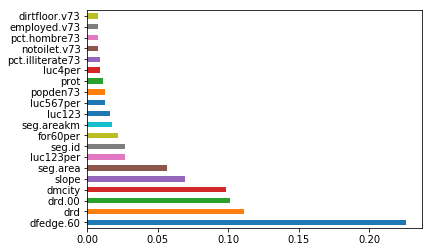

In [26]:
# Decision tree best predictors
feat_importances1 = pd.Series(dt.feature_importances_, index=df1.columns[1:54])
feat_importances1.nlargest(20).plot(kind='barh')

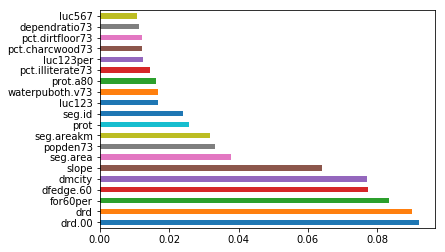

In [27]:
# Random forest best predictors
feat_importances = pd.Series(rf.feature_importances_, index=df1.columns[1:54])
feat_importances.nlargest(20).plot(kind='barh')

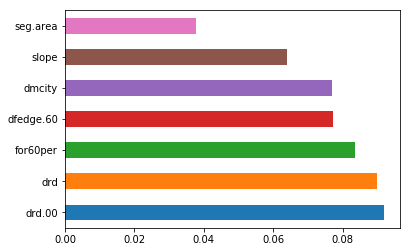

In [28]:
# Random forest best predictors
feat_importances = pd.Series(rf.feature_importances_, index=df1.columns[1:54])
feat_importances.nlargest(7).plot(kind='barh')

In [29]:
# Best 7 predictors of RF
feat_importances.nlargest(7)

drd.00       0.091946
drd          0.089909
for60per     0.083511
dfedge.60    0.077232
dmcity       0.077051
slope        0.064077
seg.area     0.037685
dtype: float64

***Prediction of 1980 with the best 7 predictors ***


In [30]:
# New data set that only contains best predictive variables from 1960
new_df1 = df1[['drd.00','drd','dfedge.60','for60per','dmcity','seg.area','slope']].copy()
new_df1[:4]
new_df1.shape

(39778, 7)

In [31]:
X11 = new_df1.values
# Prediction of 1980 using 1960
XX_train, XX_test, yy_train, yy_test = train_test_split(X11[:,1:9], X2[:,0], test_size=0.33,random_state=1)
                                                           


for name, classifier in zip(names, classifiers):
    classifier.fit(XX_train, yy_train)
    pred4 = classifier.predict(XX_test)
    print('{} -- Number of mislabeled points out of total {} points: {}'.format(name, len(yy_test), (pred4 != yy_test).sum()))
print()

GaussianNB -- Number of mislabeled points out of total 13127 points: 3937
QDA -- Number of mislabeled points out of total 13127 points: 3933
LDA -- Number of mislabeled points out of total 13127 points: 3562
kNN -- Number of mislabeled points out of total 13127 points: 3010
Decision Tree -- Number of mislabeled points out of total 13127 points: 3426
Random Forest -- Number of mislabeled points out of total 13127 points: 2869



In [32]:
print ('Predicted\nError Rate = {:0.2f}%'.format((pred4 != yy_test).sum()*100/len(yy_test)))

Predicted
Error Rate = 21.86%


In [33]:
# Confusion matrix

confusion_matrix (yy_test,pred4)


array([[6212, 1004],
       [1865, 4046]])

*Prediction of 2000 using the previous model*

In [34]:
# Prediction of 2000 using 1980                                                        
X60_train = X1[:,1:54]
Y80_train = X2[:,0]
X80_test = X2[:,1:54]
Y2000_test = X3[:,0]

for name, classifier in zip(names, classifiers):
    classifier.fit(X60_train, Y80_train)
    pred2000 = classifier.predict(X80_test)
    print('{} -- Number of mislabeled points out of total {} points: {}'.format(name, len(Y2000_test), (pred2000 != Y2000_test).sum()))
print()

GaussianNB -- Number of mislabeled points out of total 39778 points: 13506
QDA -- Number of mislabeled points out of total 39778 points: 14725


/Users/polina/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


LDA -- Number of mislabeled points out of total 39778 points: 10221


/Users/polina/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


kNN -- Number of mislabeled points out of total 39778 points: 8587
Decision Tree -- Number of mislabeled points out of total 39778 points: 8706
Random Forest -- Number of mislabeled points out of total 39778 points: 7517



In [35]:
confusion_matrix (Y2000_test,pred2000)

array([[18833,  2267],
       [ 5250, 13428]])

In [36]:
print ('Predicted\nError Rate = {:0.2f}%'.format((pred2000 != Y2000_test).sum()*100/len(Y2000_test)))

Predicted
Error Rate = 18.90%


*ROC Curve*

In [37]:
import random
random.seed(123)
random.shuffle(X1)
random.shuffle(X11)

XX1 = X1[:int(len(X1.T))]
XX2 = X11[:int(len(X11.T))]   
print(XX1.shape)
print(XX2.shape)

(55, 55)
(7, 7)


Text(0.5,1,'Covariance Matrix for 1960')

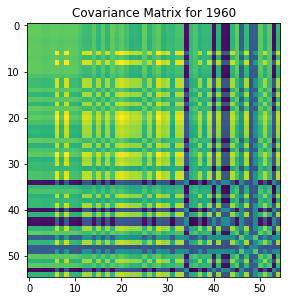

In [38]:
#plot orig and new covariance matrices(estimate w/o norm)
figure(figsize=(10,5))
subplot(121);imshow(XX1.dot(XX1.T),interpolation = 'none',cmap = 'viridis');
plt.title('Covariance Matrix for 1960')

Text(0.5,1,'Covariance Matrix for best 7 Predictors')

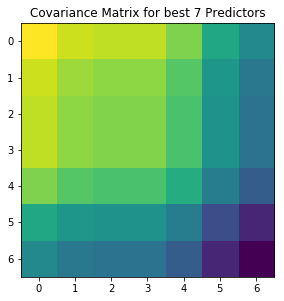

In [39]:
figure(figsize=(10,5))
subplot(122);imshow(XX2.dot(XX2.T),interpolation = 'none',cmap = 'viridis');
plt.title('Covariance Matrix for best 7 Predictors')

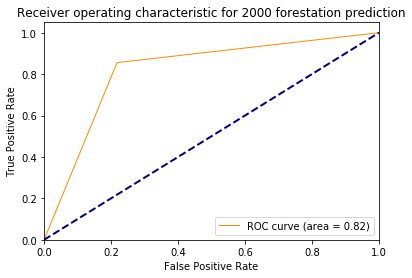

In [40]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(pred2000, Y2000_test)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for 2000 forestation prediction')
plt.legend(loc="lower right")
plt.show()